### <center> Taha Bouhoun -- Spring 2019</center>

#### For this assignment, you need to research and write an introduction to Counting Bloom Filters (CBFs), which are an extension to standard Bloom Filters. This review should be written as if it were a chapter of our textbook or a Wikipedia page on the subject, and it would explain and demonstrate Counting Bloom Filters well to a general audience.

## Part 1 ##
Give an overview of the types of operations that a CBF supports, and give a few example applications that can benefit from using CBFs.
#### Introduction to Counting Bloom Filters:
The Counting Bloom filter is a probabilistic data structure that is used to test whether an element is part of a set, hence,  It might produce false-positives or even false negative since we are able to use the delete function. Fortunately, this structure is time efficinet as most of the time it operates in constant time when inquiring, removing, or inserting.

#### CBF Operations: 
- inquiring: Looking up entries might be time expensive and require ## computational power, the counting bloom filters structures uses hash functions to map the trace of entries in a certain database. As a result, instead of looking for the entry itself, we serach wether its footprint is differerent than zero (a true negative) which takes constant time. In the case the footprint shows values different than zero, then we we can call a costly function to look up if it's actually in the database or if it's just a false positive. 

- Adding entries: Adding new entries to the bloom filter take constant time, dependent on the complexity of the hashing functions, the entry can increment up to k slots (k hash functions) which then is considered to be a footprint for the word. An additional remark is that we can store the same entry multiple times ans still represent the items in the database e.g., imagine a library that has thousands of books and we store them using their titles; let's say we have 5 copies of the same book, if we use a classic bloom filter, we increment the 3 hashed slots of the book once, but nothing changes if we add the other 4 as the slots are already non zero. In a counting bloom filter, we can increment for each copy, meaning that (in the context of the library) we can lend a copy (remove from the filter) and still have the filter showing that there still other copies in the library.

- removing items: The advantage Counting in the Bloom Filter is to be able to delete an entry from the database. Since the incrementation happens everytime the hashed entry is orioned to an index, we wouldn't delete a footprint of another entry (which is the case when using a classic 0s and 1s filter). The counter keeps track of how many times the slot was visited and not only whether is was visited yet or not. Another important detail is that we need to make sure that the element is in the dataset before excuting the delete function, otherwise we would delete a footprint of another entry instead.


#### CBF Example applications: 
- Picking a username: Coming up with a unique username might be hard as it occurs that people share your name, interest, or even book charachters that you loved. It's problimatic for a dataset to have two identical usernames for different people individuals, counting bloom filters are useful to make sure to look up if the new entry exist already. The idea is to have the filter report that the username is valid if one of the hashed indexes shows a zero. The counting feature is useful to delete the usernames that unsubscribed from the website so that new people can use them (or even in the case you deleted your account and want to join in again, you can still use your old username)

- Dating applications: After deleberate research, I didn't find conclusive evidence if dating apps are using counting bloom filters. However, I think that its features might be suitable for it If I were to create one. Dating apps depend on the location you activate the search from, what we want to avoid is to have a person that we already matched with to appear again in the "suggestion cards". Counting bloom filters can defenitly inform the program whether to display a profile. They can also be used as a security measure (since these apps are full of fake profiles) we would be able to remove an entry that was signaled frequently by users as being a "shady profile" whithout causing an existing entries to lose their traces. 

## Part 2 ##
Implement your own CBF data structure and required hash functions using Python, justifying why you’ve chosen them.

0.029
10000
0 4
(array([0, 1, 2, 3, 4]), array([7419, 2209,  332,   33,    7], dtype=int64))


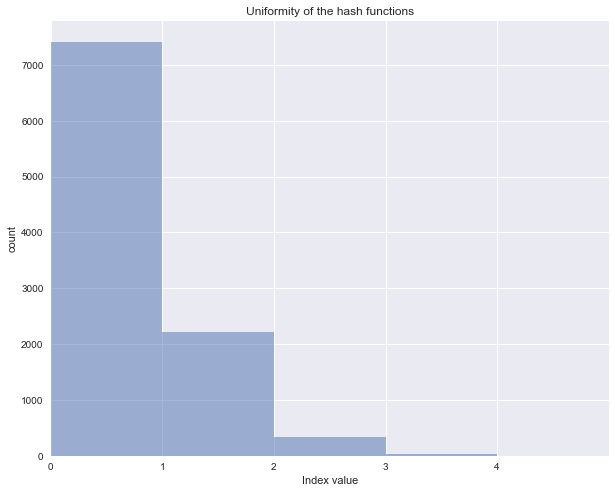

In [54]:
## COUNTING BLOOM FILTERS ##

# importing libraries to employ in the code
import string
import random
import mmh3
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

random.seed(7) # [Optional]:as a point of reference


class cb_filter(object): # creating the class of counting bloom filter
    def __init__(self, size):
        self.size = size 
        self.data = [0 for _ in range(size)] # filling the data structure with 0s
            
    def insert(self, elem): # incremneting the indices by 1 if the hashed entries lead to them
        self.data[self.h1(elem)%self.size] +=1 
        self.data[self.h2(elem)%self.size] +=1
        self.data[self.h3(elem)%self.size] +=1
    
    def search(self, elem): 
        # return True if all slots are non zeros and false if at least one has a zero
        bit1 = self.data[self.h1(elem)%self.size] # trace of an entry using the hash functions
        bit2 = self.data[self.h2(elem)%self.size]
        bit3 = self.data[self.h3(elem)%self.size]
        return  bit1 != 0 and bit2 != 0 and bit3 != 0 # check if any of the 3 slots has a 0 
    
    def remove(self, elem): 
        # this function has drawbacks, we discuss this in details in Part 5
        if not cb_filter.search(self, elem): # check whether the element is a true negative
            return print('The word does not exist') # the storage doesn't contain the entry
        else: # the entry might be there, or it can be a false positive
            self.data[self.h1(elem)%self.size] -=1 # deleting 1 from each index of the entry
            self.data[self.h2(elem)%self.size] -=1
            self.data[self.h3(elem)%self.size] -=1
    
    def h1(self, elem): # hashing using the mmh3 library
        h_1, h_2 = mmh3.hash64(elem)
        return h_1 * h_2 # returns the product of the yeild of hash1 and hash2
    
    def h2(self, elem): # hashing function inspired from pre-class CS110 8.1 
        tot = 0
        for chr in elem:
            tot = tot * 128 + ord(chr) # sums the ord of the string and multiply by 128  
        return tot
    
    def h3(self, elem): # hashing using the mmh3 library
        h_1, h_2 = mmh3.hash64(elem)
        return h_1 + h_2 # adding the results of both hashing functions


    
n = 1000 # initializing the number of entries
m = 10000 # storage capacity
cbf = cb_filter(m) # assigning the counting bloom filter as cbf

def rand_word(): # function to generate a random lower case string of size 5 to 10
    return ''.join(random.choice(string.ascii_lowercase) for i in range(random.randint(5,10)))

storage, new_entries = [], [] # the storage and new entries (for testing) 

for _ in range(n): 
    storage.append(rand_word()) # store n strings as initial database
    new_entries.append(rand_word()) # store n strings for testing 

for i in storage: 
    cbf.insert(i) # create a footprint of the words in storage in our cbf

false_pos, true_neg = 0, 0 # initialze the occurances of true - and false +

for i in new_entries: 
    if cbf.search(i) and i not in storage: # search test: True, exist in storage: False
        false_pos += 1 # increment false positive count
    else: # search test: False 
        true_neg += 1 # increment true negative count


fp_rate = false_pos/(true_neg + false_pos) # compute the rate of false positive


print(fp_rate)
print(cbf.size)
print(min(cbf.data), max(cbf.data)) # the range of the incrementation in the cbf
print(np.unique(cbf.data, return_counts=True)) # count the frequency of each index call

# Plotting the histogram of storage
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
plt.xlim([min(cbf.data), max(cbf.data)+1])
plt.hist(cbf.data, bins = max(cbf.data), alpha=0.5)
plt.xticks(range(min(cbf.data), max(cbf.data)+1))
plt.title('Uniformity of the hash functions')
plt.xlabel('Index value')
plt.ylabel('count')
plt.show()

Justifying the choice of the hashing functions:
- Uniformaity: the distribution of the hash functions output affect directly the likelihood of false positive to occur, therefore, one of the crucial characteristic of picking hash functions is that they need to be independent and uniformaly distributed but at the same time easy to compute. The tradeoff manifests in this implimentation as we need to craft hash functions that suits the context of strings. In the case above, I called murmur library (known to be fast and efficient) and implimemnted double hashing using two different functions, and in the other example, I picked a simple one (h2) that relies on the distribution of ord(chr) to balance the entries.
- Hashing functions vs. database size: when deciding how many hash functions we should be including, we need to be aware of the tradeoff that too few can cause clusters in our bloom (having most of the incrementation in one region rather than being distributed), but also too many hash functions can lead to the same result as we raise the likelihood to visit the same slot multiple times. A rule of thumb to follow in this case is the following formula that outputs the optimum number of hash functions depending on our storage capacity (m) and number of entries to store (n): 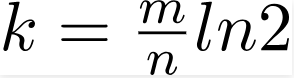

## Part 3 ##

Using your own Python implementation and generating data to push into the CBF, provide an analysis, both theoretical and experimental, of how your implementation scales in terms of:

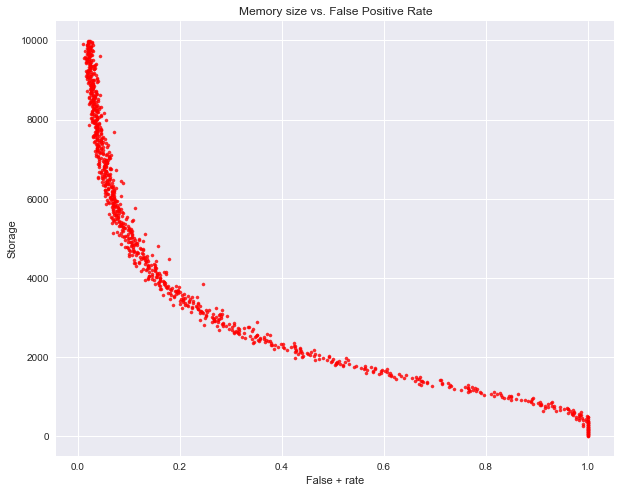

In [109]:
# a. memory size as a function of the false positive rate

rec_rate = []
storage = []
initial = 1000 # fixed initial storage in the bloom filter

for i in range(10, 10000, 10):
    false_pos, true_neg = 0, 0
    storage.append(i) # appending different storage capacities
    cbf = cb_filter(i) # create a footprint of the entries in our cbf
    
    old, new = [], [] # generate random 'initial' for storage and testing
    for j in range(initial):
        old.append(rand_word())
        new.append(rand_word())

    for j in old:
        cbf.insert(j) # create a footprint of the words in storage in our cbf
    
    for word in new:
        if cbf.search(word) and word not in old:
            false_pos += 1
        else:
            true_neg += 1
    
    # append the rate correspond to capacity
    rec_rate.append(false_pos/(true_neg + false_pos)) 
    
plt.figure(figsize=(10, 8))
plt.scatter(rec_rate, storage, alpha=0.8, s=10, color='red') 
plt.title('Memory size vs. False Positive Rate')
plt.xlabel("False + rate")
plt.ylabel("Storage")
plt.show()

#### Analysis of the results:
- memory size as a function of the false positive rate:

The grah shows a rise in false positive rate as we make the storage size smaller, this findings are intuitive since we are supposed to increment in limited slots for every entry which increases the likelihood of falling for false positives. The graph correspond to a fixed inintial entry size of 500 elements, we notice that we need 10 times that size for storage to have a 1% likelihood of false positives. The theoritical relation is discussed in depth in Part 4

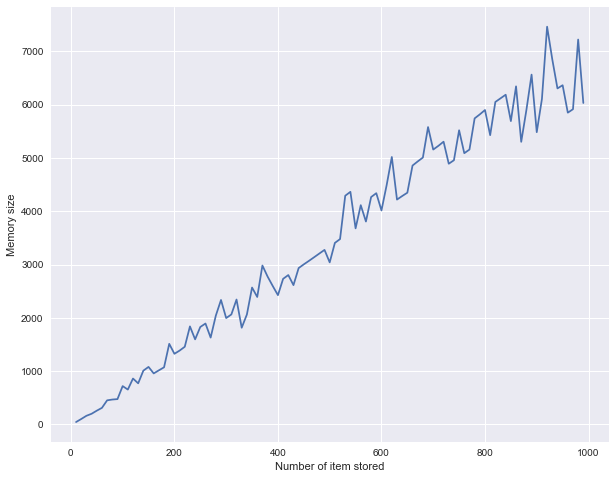

In [50]:
# b. memory size as a function of the number of items stored

fix_rate = 0.05 # set a fixed false positive rate
storage, initial = [], [] 

for i in range(10, 1000, 10):
    initial.append(i) # set the number of initial input data
    store = i         # set the capacity of the bloom filter
    fp_rate = 1       # set the max false positive rate
    
    while fp_rate > fix_rate:
        store = int(store * 1.1) # increase the storage capacity by 10%
        cbf = cb_filter(store)   # create a footprint of the entries in our cbf
   
        old, new = [], []
        for _ in range(i): # generate random 'initial' for storage and testing
            old.append(rand_word())
            new.append(rand_word())     

        for word in old: # create a footprint of the words in storage in our cbf
            cbf.insert(word)

        false_pos = 0
        true_neg = 0
        for word in new:
            if cbf.search(word):
                if word not in old:
                    false_pos += 1
            else:
                true_neg += 1

        fp_rate = false_pos/(true_neg + false_pos) # compute the fp rate
    
    storage.append(store) # append storage capacity corresponding to the initial entry size

plt.figure(figsize=(10, 8))
plt.plot(initial, storage)
plt.title("The memory size vs. initial input")
plt.xlabel("Number of item stored")
plt.ylabel("Memory size")
plt.show()

#### Analysis of the results:
- memory size as a function of the number of items stored
Based on the relation between the initial input size and false positive, we can extract the relation (given a fixed false positive rate) between storage capacity and initial entries.
the theoritical relation would be as follow: 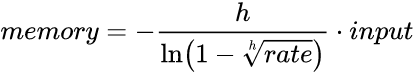
which proves that it's a linear relation and aligns with the finndings from the practical algorithm

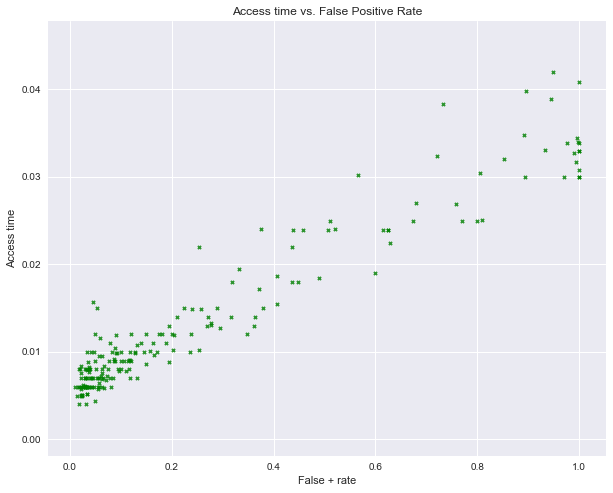

In [112]:
# c. access time as a function of the false positive rate
import time


fp_rate = []
access = []
initial = 1000 # fixed initial storage in the bloom filter

for i in range(10, 10000, 50):
    false_pos, true_neg = 0, 0
    storage.append(i)  # appending different storage capacities
    cbf = cb_filter(i) # create a footprint of the entries in our cbf
    
    old, new = [], []  # generate random 'initial' for storage and testing
    for j in range(initial):
        old.append(rand_word())
        new.append(rand_word())

    for j in old:
        cbf.insert(j) # create a footprint of the words in storage in our cbf
    
    start = time.time()
    for word in new:
        if cbf.search(word) and word not in old:
            false_pos += 1
        else:
            true_neg += 1
        
    end = time.time()
    access_time = (end-start)
    access.append(access_time)
    
    # append the false positive rate
    fp_rate.append(false_pos/(true_neg + false_pos)) 
    
plt.figure(figsize=(10, 8))
plt.scatter(fp_rate, access, alpha=0.8, s=10, color="green", marker="x") 
plt.title('Access time vs. False Positive Rate')
plt.xlabel("False + rate")
plt.ylabel("Access time")
plt.show()

#### Analysis of the results:
- access time as a function of the false positive rate
The counting bloom filter is supposed to have a constant time when searching for entries, however, there are instances when we need to access a costly function to figure out whether the word is an actual false positive.
the theoritical formula explains the likelihood to call an expensive search function in the process which scales with the number of false positives. The graph above highlights the relationship.

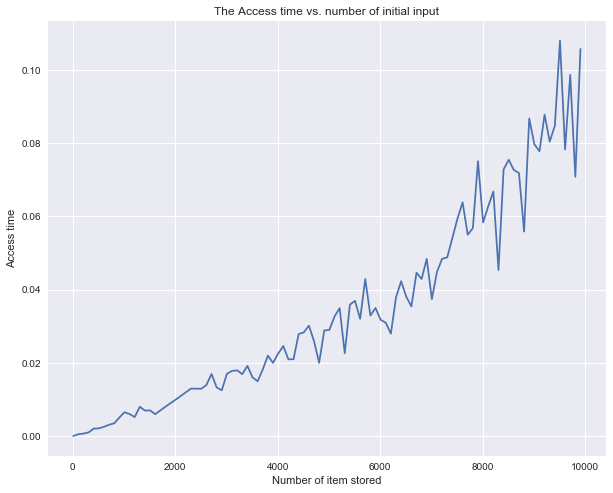

In [114]:
# d. access time as a function of the number of items stored
import time

fix_rate = 0.05 # set a fixed false positive rate
initial, access = [], [] 

for i in range(10, 10000, 100):
    initial.append(i)            # set the number of initial input data
    store = 100000               # set a fixed storage capacity of the bloom filter
    false_pos, true_neg = 0, 0   # initialize the counts of false + and true -
    while True:
        cbf = cb_filter(store)
   
        old, new = [], []
        for _ in range(i): # generate random entries for storage and testing
            old.append(rand_word())
            new.append(rand_word())     

        for word in old: # create a footprint of the words in storage in our cbf
            cbf.insert(word)
        
        
        start = time.time() # timer for the access function
        for word in new:
            if cbf.search(word) and word not in old:
                false_pos += 1
            else:
                true_neg += 1
        end = time.time() 
        
        access_time = (end-start) # save the duration of the inquiry
        if false_pos/(true_neg + false_pos) <= fix_rate:
            access.append(access_time) # record the access time if rate <= fixed_rate
            break # break to test a different initial input size
    
plt.figure(figsize=(10, 8)) 
plt.plot(initial, access) #, s=10, color="green", marker="o") 
plt.title("The Access time vs. number of initial input")
plt.xlabel("Number of item stored")
plt.ylabel("Access time")
plt.show()

#### Analysis of the results:
- d: access time as a function of the number of items stored
Recall that in graph b, the linear relation between storage and input size for a fixed false positive rate. In this case, we expect to have a linear relation too but since we're bounded by a false positive rate that fluctuates between 0 and 0.05 and keeing in mind the computational power variation over time (Although I tried to empty all my PC applications to run this) we still notice a trend that follows the complexity of the theoritical expectation O(1/e)

## Part 4 ##
Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.

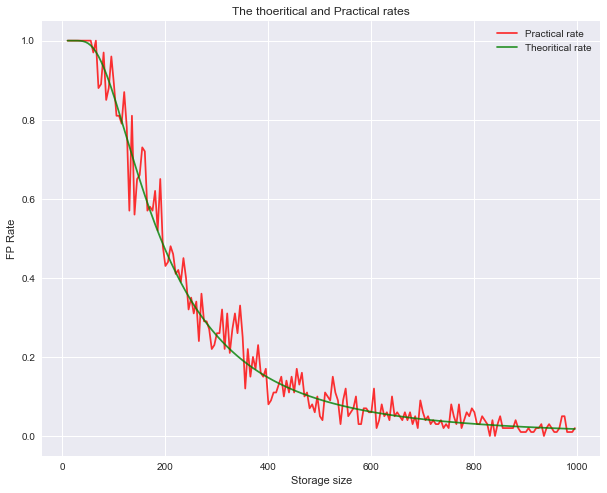

In [250]:
import math
import matplotlib.pyplot as plt


theory_rate = []
practice_rate = []
storage = []  # storage capacity
entries = 100 # fixed initial entries in the database
hash_func = 3 # setting the number of hash functions

# Theoritical expected rate of false positive
for m in range(10, 1000, 5):
    # Compute the theoritical rate for every storage capacity
    # theory_rate.append((1 - (1 - (1/m))**(h*entries))**h) # original version
    theory_rate.append((1 - math.exp(-h*entries/m))**h) # simplified
    root(fp, h) = 1 - math.exp(-h*n/m)
    n (-h)/ln(1 - root(fp, h)) = m


# Practical expected rate of false positive
for i in range(10, 1000, 5):
    false_pos, true_neg = 0, 0 
    old, new = [], []
    
    storage.append(i)  # set the storage capacity
    cbf = cb_filter(i) 
    
    for j in range(entries): # generate random words to store and test
        old.append(rand_word())
        new.append(rand_word())

    for j in old:
        cbf.insert(j) # create a footprint of the words in storage in our cbf
    
    for word in new: # check the false positive and true negative counts
        if cbf.search(word) and word not in old:
            false_pos += 1
        else:
            true_neg += 1
    
    # Compute the rate for a given storage size
    practice_rate.append(false_pos/(true_neg + false_pos)) 

# plotting the results of the practical and theoritical relation

plt.figure(figsize=(10, 8))
plt.scatter(storage, practice_rate, color = 'red', alpha = 0.8, label='Practical rate')
plt.plot(storage, theory_rate, color = 'green', alpha = 0.8, label='Theoritical rate')
plt.legend(loc=1)
plt.title('The thoeritical and Practical rates')
plt.xlabel("Storage size")
plt.ylabel("FP Rate")
plt.show()

#### Comments on the findings in Part 4
As mentioned in the code above, the false positive rate is expressed in the function of:
- h: the number of hashing functions
- storage (or m): the capacity of storage of our counting bloom filter
- initial: the pre stored words in our bloom

The relation then can be written as 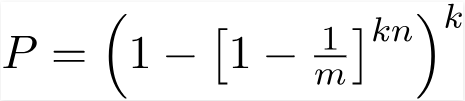

We notice that the theoritical and practical rate follow the same trend as storage size grows the false positive rate declines until we reach the point where the likelihood of encountering one would be less than 1% 

## Part 5 ##
Enumerate (if any) corner cases that one might find in CBFs.

A corner case in the scheme of counting bloom filters is that we might still run into false negative when we use the delete function as we delete items once they pass the search test without making sure if they do actually exist in the database or they might just be false positives. As mentioned below in the digram, the case in which this might lead us to instances where we judge that an entry is to in the database despite that it exist but its footprint is deleted after removing an item that doesn't exist in the storage.

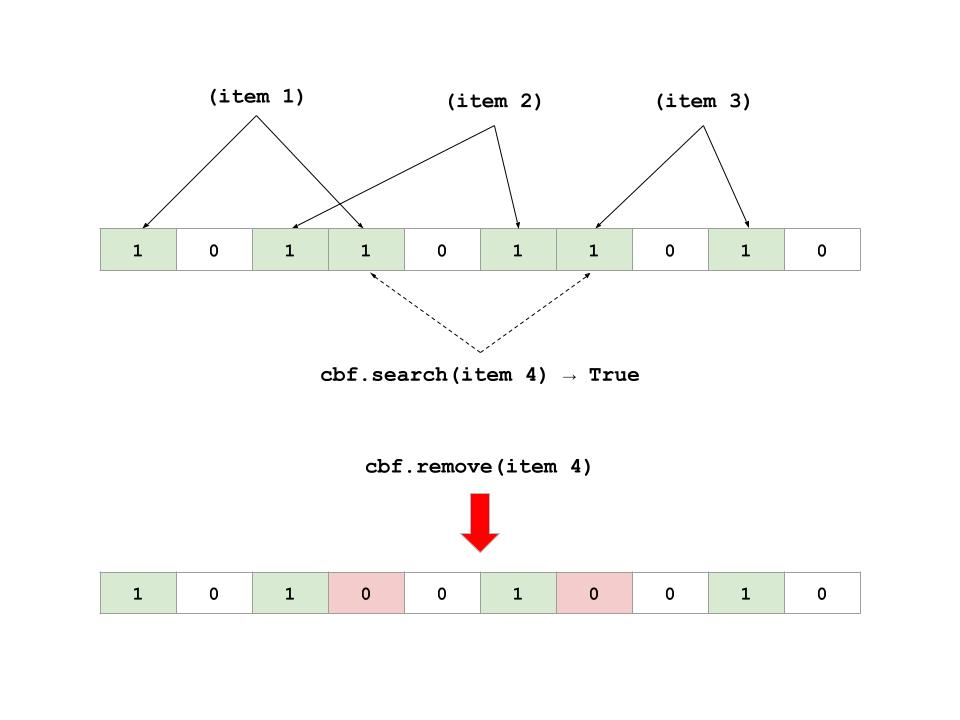

In [241]:
from IPython.display import Image
Image(filename = "False negative case.jpg")

As mentioned above, both items 1 and 3 exist in storage, we made the call to see if any of the slots for item 4 are 0s using the search function. However, we can see that it was a false positive. Deleting item 4 although didn't exist before would lead us to lose the footprint of item 1 and 3 meaning that next time when we search for them, the search function is going to output that they're not in storage whereas in reality, they're there.

## Appendix:
#### References:
- Guo, D., Liu, Y., Li, X., & Yang, P. (2010). False Negative Problem of Counting Bloom Filter. IEEE Transactions on Knowledge and Data Engineering, 22, 651-664. Retrieved from: https://www.semanticscholar.org/paper/False-Negative-Problem-of-Counting-Bloom-Filter-Guo-Liu/30b37bc710588c02fbe549a7f94eef51539122b7?navId=citing-papers
- Wikipedia (2019). Counting Bloom Filters. Retrieved from: https://en.wikipedia.org/wiki/Bloom_filter#Counting_filters
- Elham Safi, Student Member, IEEE, Andreas Moshovos, Senior Member, IEEE, and Andreas Veneris, Senior Member, IEEEL-CBF: A Low-Power, Fast Counting Bloom Filter Architecture. Retrieved from: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.152.813&rep=rep1&type=pdf



